In [ ]:
from nltk.corpus import brown
from sklearn.model_selection import train_test_split

- In the scope of this assignment we will use the `Brown Corpus`.
    - It was the first million-word electronic corpus of English.
    - This corpus includes text from **500** sources, and the sources have been categorized by **genre**, like news, editorial etc ([source](https://www.nltk.org/book/ch02)).

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
len(brown.sents())

57340

- As we see above, this corpus includes **57340** sentences.
- Let's we randomly see ten (10) tokenised sentences.

In [ ]:
sentences = brown.sents()
for sent in sentences[:10]:
    print(sent)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']
['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.']
['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'reports

- We will split the data into **training**, **dev** ans **test** sets.

In [ ]:
# Define the split ratios
test_ratio = 0.1 # 10% for the test set
dev_ratio = 0.1   # 10% for the validation (dev) set
train_ratio = 1 - (test_ratio + dev_ratio)  # Remaining 80% for training

# Step 1: Split into train+dev and test sets
train_dev_set, test_set = train_test_split(sentences,
                                           test_size=test_ratio,
                                           random_state=42)

# Step 2: Split train+dev into train and dev (validation) sets
dev_ratio_adjusted = dev_ratio / (train_ratio + dev_ratio)  # Adjusted ratio for remaining data
train_set, val_set = train_test_split(train_dev_set,
                                      test_size=dev_ratio_adjusted,
                                      random_state=42)

# Outputs
print(f"Train set size: {len(train_set)}")
print(f"Dev set size: {len(val_set)}")
print(f"Test set size: {len(test_set)}")

Train set size: 45872
Dev set size: 5734
Test set size: 5734


### **Preprocess and Vocabulary Creation** :
- We remove punctuations from both the vocabulary and the preprocessing of sentences, as they do not contribute meaningful information and only add noise.
- Since brown.sents() is already tokenized, we decided to retain this tokenization during preprocessing.

In [ ]:
import string
import re

In [ ]:
from collections import Counter

def create_vocab(train_text, min_freq=10):
    """
    Create a vocabulary from the training text.

    Args:
        train_text (list of list of str): Tokenized sentences from the training set.
        min_freq (int): Minimum frequency for a token to be included in the vocabulary.

    Returns:
        dict: A dictionary mapping each token to its frequency in the training text.
    """


    # Flatten the list of sentences into a single list of words
    flattened_tokens = [token.lower() for sentence in train_text for token in sentence]

    # Clean punctuation using regex (removing punctuation like '' , `` . etc.)
    cleaned_tokens = [re.sub(f"[{string.punctuation}]", "", token) for token in flattened_tokens]

    # Count token frequencies
    token_counts = Counter(cleaned_tokens)

    # Include tokens with a minimum frequency
    vocab = {token: count for token, count in token_counts.items() if count >= min_freq}

    return vocab

In [ ]:
vocab = create_vocab(train_set, min_freq=10)

In [ ]:
word_to_check = "."

if word_to_check in vocab:
    print(f"The word '{word_to_check}' is in the vocabulary.")
else:
    print(f"The word '{word_to_check}' is NOT in the vocabulary.")


The word '.' is NOT in the vocabulary.


In [ ]:
def preprocess(text, vocab):
    """
    Preprocess text by tokenizing, converting to lowercase, and replacing OOV tokens with <UNK>.

    Args:
        text (list of list of str): Tokenized sentences.
        vocab (set): Vocabulary of known tokens.

    Returns:
        list of list of str: Preprocessed sentences.
    """
    processed_sentences = []

    for sentence in text:
        # Ensure each token in the sentence is lowercase
        tokens = [word.lower() for word in sentence]

        # Remove punctuation from the tokens
        tokens = [re.sub(f"[{string.punctuation}]", "", token) for token in tokens]

        # Remove empty tokens after punctuation removal
        tokens = [token for token in tokens if token.strip()]

        # Replace OOV tokens with <UNK> if they are not in the vocab
        tokens_with_unk = [token if token in vocab else "<UNK>" for token in tokens]

        processed_sentences.append(tokens_with_unk)

    return processed_sentences

- Apply preprocess for `train`, `dev` and `test` sets.

In [ ]:
train_sent = preprocess(train_set, vocab)
test_sent = preprocess(test_set, vocab)
val_sent = preprocess(val_set, vocab)

In [ ]:
# Print the first 10 tokens of train and test after preprocessing
print(f"First 10 tokens from the train set: {train_sent[:10]}")
print(f"First 10 tokens from the test set: {test_sent[:10]}")

First 10 tokens from the train set: [['it', 'is', 'not', 'their', '<UNK>', 'that', '<UNK>'], ['her', 'debut', 'over', 'perhaps', 'the', 'earlier', 'scenes', 'will', 'emerge', 'equally', 'fine'], ['most', 'of', 'our', 'largest', 'cities', 'have', 'one', 'or', 'more', 'separate', 'vocational', 'or', 'technical', 'high', 'schools'], ['his', 'expenses', 'ran', 'another', 'four', 'or', 'five', 'thousand'], ['i', 'would', 'propose', 'next', 'as', 'the', 'prime', 'requirement', 'for', 'constitution', 'of', 'new', 'basic', 'lists', 'items', 'whose', 'forms', 'show', 'as', 'high', 'an', 'empirical', '<UNK>', 'rate', 'as', 'possible'], ['many', 'of', 'our', 'very', 'best', 'friends', 'are', '<UNK>'], ['it', 'may', 'on', 'occasion', 'be', 'anything', 'but', 'that'], ['so', 'that', 'a', 'line', 'running', 'down', 'the', 'length', 'of', 'the', 'south', '<UNK>', 'the', 'upper', 'limits', 'of', '<UNK>', 'would', 'roughly', 'divide', 'the', 'old', 'south', 'from', 'the', 'new', 'but', 'with', 'of', 'c

- The `most frequent word` is the `<UNK>` & that because we have set the minimum frequency equals to 10.

In [ ]:
from tabulate import tabulate

flat_words = [word for sentence in train_sent for word in sentence]
word_frequencies = Counter(flat_words)

# Prepare data for tabulate and sort in descending order by frequency
table_data = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the table
print(tabulate(table_data, headers=["Word", "Frequency"], tablefmt="grid"))

+-------------------+-------------+
| Word              |   Frequency |
+===================+=============+
| <UNK>             |       84097 |
+-------------------+-------------+
| the               |       56144 |
+-------------------+-------------+
| of                |       29370 |
+-------------------+-------------+
| and               |       23148 |
+-------------------+-------------+
| to                |       20964 |
+-------------------+-------------+
| a                 |       18740 |
+-------------------+-------------+
| in                |       17133 |
+-------------------+-------------+
| that              |        8506 |
+-------------------+-------------+
| is                |        8108 |
+-------------------+-------------+
| was               |        7909 |
+-------------------+-------------+
| for               |        7624 |
+-------------------+-------------+
| he                |        7614 |
+-------------------+-------------+
| it                |       

In [ ]:
from nltk.util import ngrams

In [ ]:
# Define N-gram parameters and counters
N = 5
unigram_counter = Counter()
bigram_counter = Counter()
trigram_counter = Counter()

# Define padding parameters
pad_left = True
pad_right = True
left_pad_symbol = "<s>"
right_pad_symbol = "<e>"

# Train n-gram models
for sentence in train_sent:
    # Generate and update unigram counts
    unigrams = ngrams(sentence, 1, pad_left=pad_left, pad_right=pad_right,
                      left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    unigram_counter.update(unigrams)

    # Generate and update bigram counts
    bigrams = ngrams(sentence, 2, pad_left=pad_left, pad_right=pad_right,
                     left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    bigram_counter.update(bigrams)

    # Generate and update trigram counts
    trigrams = ngrams(sentence, 3, pad_left=pad_left, pad_right=pad_right,
                      left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    trigram_counter.update(trigrams)

# Display the top-N most frequent n-grams
print(f"Top {N} Unigrams:", unigram_counter.most_common(N))
print(f"Top {N} Bigrams:", bigram_counter.most_common(N))
print(f"Top {N} Trigrams:", trigram_counter.most_common(N))

Top 5 Unigrams: [(('<UNK>',), 84097), (('the',), 56144), (('of',), 29370), (('and',), 23148), (('to',), 20964)]
Top 5 Bigrams: [(('the', '<UNK>'), 10528), (('<UNK>', '<UNK>'), 9989), (('<UNK>', '<e>'), 8667), (('of', 'the'), 7875), (('<s>', 'the'), 5668)]
Top 5 Trigrams: [(('<UNK>', '<e>', '<e>'), 8667), (('<s>', '<s>', 'the'), 5668), (('<s>', '<s>', '<UNK>'), 2886), (('<s>', '<s>', 'he'), 2426), (('<UNK>', 'and', '<UNK>'), 1733)]


In [ ]:
def laplace_smoothing(ngram, counter, n_minus1_counter, alpha, vocab_size):
    """
    Calculate the smoothed probability of an n-gram using Laplace smoothing.

    :param ngram (tuple): The n-gram for which the probability is calculated (e.g., ('the', 'cat')).
    :param counter (Counter): A Counter object holding counts of the n-grams (e.g., bigram counts).
    :param n_minus1_counter (Counter or None): A Counter object holding counts of (n-1)-grams
                                            (e.g., unigram counts for bigrams), or None for unigrams.
    :param alpha (float): The smoothing parameter (e.g., alpha=1 for standard Laplace smoothing).
    :param vocab_size (int): The total size of the vocabulary (unique tokens in the corpus).

    :return float: The smoothed probability of the given n-gram.
    """
    # Step 1: Count the occurrences of the n-gram in the training data
    ngram_count = counter[ngram]

    # Step 2: Determine the prefix (n-1)-gram
    # For unigrams, there is no prefix, so we treat n_minus1_counter as None
    prefix = ngram[:-1]  # Excludes the last token in the n-gram (e.g., ('the', 'cat') -> ('the'))

    # Step 3: Get the count of the prefix (n-1)-gram
    # For unigrams, the prefix_count is the sum of all unigram counts
    if n_minus1_counter:
        prefix_count = n_minus1_counter[prefix]
    else:
        prefix_count = sum(counter.values())  # Total number of unigrams

    # Step 4: Apply Laplace smoothing formula
    # Add alpha to the numerator (ngram count) and alpha * vocab_size to the denominator (prefix count)
    smoothed_prob = (ngram_count + alpha) / (prefix_count + alpha * vocab_size)

    return smoothed_prob

Note : N-gram models use the **sum of logarithms** to avoid numerical underflow, simplify computations,
and ensure robustness when dealing with small probabilities.

In [ ]:
import numpy as np

def evaluate_model(alpha, ngram_counter, n_minus1_counter, vocab_size, ngrams):
    """
    Evaluate the model by calculating the perplexity on the provided N-grams (e.g., from the validation or test set).

    :param alpha (float): The smoothing parameter to test.
    :param ngram_counter (Counter): Counter object holding counts of N-grams (e.g., trigram counts).
    :param n_minus1_counter (Counter or None): Counter for (n-1)-grams (e.g., bigram counts for trigrams).
    :param vocab_size (int): Total size of the vocabulary.
    :param ngrams_dev (list of tuples): List of N-grams from the validation or test set.

    :return float: Perplexity of the N-grams in the provided set.
    """
    total_log_prob = 0

    for ngram in ngrams:
        # Skip N-grams involving start tokens like <s>, <start1>, <start2>
        if any(token.startswith("<s>") for token in ngram):
            continue

        # Apply Laplace smoothing to calculate probability for the current N-gram
        prob = laplace_smoothing(ngram, ngram_counter, n_minus1_counter, alpha, vocab_size)

        # Sum the log probabilities for valid N-grams
        total_log_prob += np.log2(prob)  # Log base 2

    # Calculate average log probability
    cross_entropy = -total_log_prob / len(ngrams)

    # Convert to perplexity
    perplexity = 2**(cross_entropy) if cross_entropy != 0 else float('inf')
    return cross_entropy, perplexity

In [ ]:
# Generate N-grams for the validation set (dev_set)
unigram_dev_counter = Counter()
bigram_dev_counter = Counter()
trigram_dev_counter = Counter()

for sentence in val_sent:
    # Generate and update unigram counts
    unigrams = ngrams(sentence, 1, pad_left=pad_left, pad_right=pad_right,
                      left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    unigram_dev_counter.update(unigrams)

    # Generate and update bigram counts
    bigrams = ngrams(sentence, 2, pad_left=pad_left, pad_right=pad_right,
                     left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    bigram_dev_counter.update(bigrams)

    # Generate and update trigram counts
    trigrams = ngrams(sentence, 3, pad_left=pad_left, pad_right=pad_right,
                      left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    trigram_dev_counter.update(trigrams)

In [ ]:
# Generate N-grams for the test set (test_set)
unigram_test_counter = Counter()
bigram_test_counter = Counter()
trigram_test_counter = Counter()

for sentence in test_sent:
    # Generate and update unigram counts
    unigrams = ngrams(sentence, 1, pad_left=pad_left, pad_right=pad_right,
                      left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    unigram_test_counter.update(unigrams)

    # Generate and update bigram counts
    bigrams = ngrams(sentence, 2, pad_left=pad_left, pad_right=pad_right,
                     left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    bigram_test_counter.update(bigrams)

    # Generate and update trigram counts
    trigrams = ngrams(sentence, 3, pad_left=pad_left, pad_right=pad_right,
                      left_pad_symbol=left_pad_symbol, right_pad_symbol=right_pad_symbol)
    trigram_test_counter.update(trigrams)

In [ ]:
print(f"Number of trigrams in validation set: {len(list(trigram_dev_counter.elements()))}")
#print(f"Number of trigrams in test set: {len(list(trigram_test_counter.elements()))}")
print(f"Number of trigrams in test set: {len(list(trigram_counter.elements()))}")

Number of trigrams in validation set: 111383
Number of trigrams in test set: 905307


## Trigram Perplexity

- `Best a = 0.01`

In [ ]:
# Define a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 2.0, 10.0]
vocab_size = len(unigram_counter) # this must be based on the training set

# Initialize variables to track the best alpha and its score
best_alpha = None
best_avg_log_prob = float('inf')

# Generate N-grams for the validation set
ngrams_dev = list(trigram_dev_counter.elements())

# Iterate over each alpha value
for alpha in alpha_values:
    # Call evaluate_model for the current alpha
    cross, perplexity = evaluate_model(alpha, trigram_counter, bigram_counter, vocab_size, ngrams_dev)

    # Print the result for tracking
    print(f"Alpha: {alpha}, Perplexity: {perplexity:.2f}")

    # Update the best alpha if the current one performs better
    if perplexity < best_avg_log_prob:
        best_alpha = alpha
        best_avg_log_prob = perplexity

# Output the best alpha and corresponding performance
print(f"Best Alpha: {best_alpha}, Best Perplexity: {best_avg_log_prob:.2f}")

Alpha: 0.001, Perplexity: 454.37
Alpha: 0.01, Perplexity: 452.30
Alpha: 0.1, Perplexity: 666.39
Alpha: 1.0, Perplexity: 1183.19
Alpha: 2.0, Perplexity: 1397.71
Alpha: 10.0, Perplexity: 1917.24
Best Alpha: 0.01, Best Perplexity: 452.30


## Bigram perplexity

- `Best a = 0.01`

In [ ]:
# Define a range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1.0, 2.0, 10.0]
vocab_size = len(unigram_counter)

# Initialize variables to track the best alpha and its score
best_alpha = None
best_avg_log_prob = float('inf')

# Generate N-grams for the validation set
ngrams_dev = list(bigram_dev_counter.elements())

# Iterate over each alpha value
for alpha in alpha_values:
    # Call evaluate_model for the current alpha
    cross, perplexity = evaluate_model(alpha, bigram_counter, unigram_counter, vocab_size, ngrams_dev)

    # Print the result for tracking
    print(f"Alpha: {alpha}, Perplexity: {perplexity:.2f}")

    # Update the best alpha if the current one performs better
    if perplexity < best_avg_log_prob:
        best_alpha = alpha
        best_avg_log_prob = perplexity

# Output the best alpha and corresponding performance
print(f"Best Alpha: {best_alpha}, Best Perplexity: {best_avg_log_prob:.2f}")

Alpha: 0.001, Perplexity: 231.46
Alpha: 0.01, Perplexity: 198.13
Alpha: 0.1, Perplexity: 253.99
Alpha: 1.0, Perplexity: 482.71
Alpha: 2.0, Perplexity: 614.82
Alpha: 10.0, Perplexity: 1099.23
Best Alpha: 0.01, Best Perplexity: 198.13


### **Notes** :
1. `Lower perplexity of bigrams :` trigrams require more specific context (two preceding words), leading to many unseen combinations in the training data. Add-a smoothing spreads probability mass to these unseen trigrams, increasing their likelihood but also penalizing seen trigrams, leading to higher perplexity overall.

2. Since we have replaced rare words (with a frequency of 10 or fewer) with `<UNK>`, a smoothing parameter of α=0.01 is acceptable for both the bigram and trigram models.

# **Evaluation**

- At this step, the aim is to evaluate the performance of `trigrams` and `bigrams` using Add-α (Laplace) smoothing on the test set by analyzing metrics such as perplexity and cross-entropy. These metrics help assess how well the model predicts the observed data, with lower values indicating better performance.

In [ ]:
ngrams_test = list(trigram_test_counter.elements())  # List of trigram N-grams from the test set
ngrams_test_b = list(bigram_test_counter.elements())  # List of trigram N-grams from the test set

alpha = 0.01
vocab_size = len(unigram_counter)  # train set

# Evaluate the model on the test set using the defined alpha
cross, perplexity = evaluate_model(alpha, trigram_counter, bigram_counter, vocab_size, ngrams_test)

# Print the perplexity result
print("Evaluation of the trigram using add-a method:")
print(f"Cross entropy on the test set: {cross:.2f}")
print(f"Perplexity on the test set: {perplexity:.2f}")

print()
print("----------------")
print()

# Evaluate the model on the test set using the defined alpha
cross_b, perplexity_b = evaluate_model(alpha, bigram_counter, unigram_counter, vocab_size, ngrams_test_b)

# Print the perplexity result
print("Evaluation of the bigram using add-a method:")
print(f"Cross entropy on the test set: {cross_b:.2f}")
print(f"Perplexity on the test set: {perplexity_b:.2f}")

Evaluation of the trigram using add-a method:
Cross entropy on the test set: 8.84
Perplexity on the test set: 459.28

----------------

Evaluation of the bigram using add-a method:
Cross entropy on the test set: 7.65
Perplexity on the test set: 201.09


---

# **Beam Search**

- Given a specific number of words, use bigrams or trigrams to predict the next words.

- We take a sentence from the test set to evaluate whether the trained model can correctly predict the next words in the sentence.

- Because the most frequent word in the vocabulary is the `<UNK>`, which influences the n-grams, we penalize the likelihood of `<UNK>`: if next_word == `<UNK>`, next_prob = 0.0001 # Reduce `<UNK>` likelihood.

In [ ]:
import heapq

def beam_search(sentence, model, ngram_counter, n_minus1_counter, vocab_size, alpha, num_next_words, beam_width=5):
    """
    Autocomplete a sentence using beam search to predict a fixed number of next words.

    :param sentence: The initial incomplete sentence (list of words).
    :param model: The type of model ("bigram" or "trigram").
    :param ngram_counter: Counter for n-grams.
    :param n_minus1_counter: Counter for (n-1)-grams.
    :param vocab_size: Vocabulary size.
    :param alpha: Smoothing parameter.
    :param num_next_words: Number of words to predict after the initial sentence.
    :param beam_width: Number of beams to keep at each step (the top-k most probable sequences).
    :return: The completed sentence with the specified number of additional words.
    """
    # Initialize the completed sentences list with the initial sentence and its probability (1.0).
    completed_sentences = [(sentence, 1.0)]  # List of (sentence, probability) tuples

    # Loop to predict a fixed number of words
    for _ in range(num_next_words):
        candidates = []

        # Iterate over each of the current completed sentences
        for partial_sentence, prob in completed_sentences:
            # Determine the prefix based on the model type (bigram or trigram)
            if model == "bigram":
                prefix = (partial_sentence[-1],)  # Last word for bigram
            elif model == "trigram" and len(partial_sentence) >= 2:
                prefix = tuple(partial_sentence[-2:])  # Last two words for trigram
            else:
                prefix = (partial_sentence[-1],)  # Fallback for bigram

            # Get the probabilities for all possible next words
            next_words_probs = {}
            for next_word in ngram_counter:
                if isinstance(next_word, tuple) and next_word[:-1] == prefix:
                    next_ngram = next_word
                    next_word_prob = laplace_smoothing(next_ngram, ngram_counter, n_minus1_counter, alpha, vocab_size)
                    next_words_probs[next_word[-1]] = next_word_prob

            if not next_words_probs:
                continue  # Skip this iteration if no valid next words are found

            # Sort by probability and pick top-K candidates
            top_candidates = heapq.nlargest(beam_width, next_words_probs.items(), key=lambda x: x[1])

            # Generate new candidate sentences with updated probabilities
            for next_word, next_prob in top_candidates:
                if next_word == "<UNK>":
                    next_prob *= 0.0001  # Reduce `<UNK>` likelihood

                # Add the next word to the sentence
                new_sentence = partial_sentence + [next_word]
                new_prob = prob * next_prob  # Update the probability
                candidates.append((new_sentence, new_prob))


        # If no candidates were generated, exit the loop
        if not candidates:
            break

        # Sort all candidate sentences by their cumulative probability
        completed_sentences = heapq.nlargest(beam_width, candidates, key=lambda x: x[1])

        # Print the top 5 candidates after each iteration (optional)
        print(f"Top {beam_width} candidates at this step:")
        for i, (sentence, prob) in enumerate(completed_sentences[:beam_width]):
            # Ensure we print out only words (strings) and join them correctly
            print(f"Candidate {i+1}: {' '.join(str(word) for word in sentence)} (Probability: {prob})")
        print()

    # Return the sentence with the highest probability as a string
    best_sentence = completed_sentences[0][0] if completed_sentences else sentence  # Fallback to original sentence if empty

    best_sentence = [str(word) for word in best_sentence]
    return " ".join(best_sentence)

In [ ]:
start_sentence = test_sent[1][:2]  # Take the first 3 words as the start
sentence = start_sentence

model1="bigram"
model2="trigram"
ngram_counter_bigram=bigram_counter
ngram_counter_trigram=trigram_counter
ngram_counter_unigram=unigram_counter


beam_width=3
num_next_words=15

In [ ]:
print("Initial sentence:")
print(' '.join(test_sent[1]))

print()

# Generate words using the Bigram model
print("Bigram Model Autocompletion:")
bigram_autocomplete = beam_search(sentence=start_sentence, model=model1, ngram_counter=ngram_counter_bigram, n_minus1_counter=ngram_counter_unigram,
                                            vocab_size=len(unigram_counter), alpha=0.01, num_next_words=num_next_words, beam_width=beam_width)

print(bigram_autocomplete)

print()

# Generate words using the Trigram model
print("Trigram Model Autocompletion:")
trigram_autocomplete = beam_search(sentence=start_sentence, model=model2, ngram_counter=ngram_counter_trigram, n_minus1_counter=ngram_counter_bigram,
                                            vocab_size=len(unigram_counter), alpha=0.01, num_next_words=num_next_words, beam_width=beam_width)

print(trigram_autocomplete)

Initial sentence:
and you think you have language problems

Bigram Model Autocompletion:
Top 3 candidates at this step:
Candidate 1: and you <e> (Probability: 0.06055506643932049)
Candidate 2: and you can (Probability: 0.04681028109943424)
Candidate 3: and you are (Probability: 0.04272399356595454)

Top 3 candidates at this step:
Candidate 1: and you can be (Probability: 0.012989675949658124)
Candidate 2: and you are not (Probability: 0.001993390085065809)
Candidate 3: and you are the (Probability: 0.0017560958662614747)

Top 3 candidates at this step:
Candidate 1: and you can be a (Probability: 0.000655247514162941)
Candidate 2: and you can be the (Probability: 0.0003612693130632602)
Candidate 3: and you are not only (Probability: 9.063971901819603e-05)

Top 3 candidates at this step:
Candidate 1: and you can be a few (Probability: 1.0414409621991949e-05)
Candidate 2: and you can be a little (Probability: 8.463949975720757e-06)
Candidate 3: and you are not only a (Probability: 7.15669

---

# **Beam Search Decoder for Spelling Correction**

#### Total Score:
$[
\text{Total score} = \text{LM score} + \text{EM score}
]$


Where:
- **LM score** is computed based on the language model.
- **EM score** is computed using Levenshtein distance.

### 1. **Language Model Score**
The **Language Model (LM) score** calculates the probability of a word sequence using the n-gram language model (e.g., bigram, trigram). The probability of the sequence is smoothed using **Laplace smoothing**, and then the logarithm of the probability is taken to avoid very small values.

#### LM Score:
$[
\text{LM score} = \sum_{i=1}^{|\text{new\_seq}| - n + 1} \log_2 \left( \frac{\text{count}(ngram_i) + \alpha}{\text{count}(n-1\_gram_i) + \alpha \cdot \text{vocab\_size}} \right)
]$

Where:
- $( \text{count}(ngram_i) )$ is the count of the n-gram $( ngram_i )$ in the training data.
- $( \text{count}(n-1\_gram_i) )$ is the count of the (n-1)-gram prefix of $( ngram_i )$.
- $( \alpha )$ is the smoothing parameter (Laplace smoothing).
- $( \text{vocab\_size} )$ is the total number of unique words in the vocabulary.

### 2. **Error Model Score**
The **Error Model (EM) score** measures how likely a misspelled word (`observed_word`) can be corrected to a candidate word. This score is calculated using **Levenshtein distance**, which is the number of insertions, deletions, or substitutions needed to transform one word into another. The score is the **negative Levenshtein distance** because a lower distance indicates higher similarity between the observed word and the candidate word.

#### EM Score:
$[
\text{EM score} = -\text{Levenshtein distance}(\text{observed}, \text{candidate})
]$

Where:
- $( \text{Levenshtein distance} )$ is the number of edits (insertions, deletions, substitutions) required to transform `observed` into `candidate`.

### 3. **Total Score**
The **Total score** is the sum of the **Language Model score** and the **Error Model score**. This score is used to rank different candidate word sequences, with higher total scores indicating better candidates.

### 4. **Beam Search Update**
At each decoding step, the beam search algorithm keeps track of the top \( k \) sequences (beam width). For each candidate, we compute the total score and update the beam by keeping only the top \( k \) candidates.

#### Beam Search Update:
$[
\text{new\_beam} = \text{Top-k}(\text{candidates}, k = \text{beam\_width})
]$
Where:
- $( \text{candidates} )$ are the possible continuations of the current sequence (with their respective total scores).
- $( \text{Top-k} )$ returns the top \( k \) sequences with the highest total scores.

### 5. **Final Output**
The final output of the beam search is the sequence with the highest score after processing the entire observed sequence. If no valid candidates are found at any step, the algorithm returns the best sequence from the previous step.

#### Final Output:
$[
\text{Best sequence} = \max(\text{beam}, \text{key} = \lambda x: x[0])[1]
]$

Where:
- **beam** is the list of candidate sequences with their respective scores.
- The sequence with the highest score is returned.

**Handling `<UNK>`** :
- When a word is replaced by <UNK>, it indicates that the word is not found in the model's vocabulary. One approach to handling this is using Laplace smoothing to select the most probable word from the vocabulary to replace <UNK>. This method relies on the vocabulary and is based on smoothing techniques to estimate the likelihood of unseen words. However, this may not always yield the best results, especially when the <UNK> token is the result of a heavy misspelling or a rare word that’s poorly represented.

- To improve on this, we can leverage contextual information from the surrounding words. By considering the words before and after the <UNK> token, we can generate more informed candidate predictions. This context-driven approach helps to choose a word that fits better within the sentence and preserves the overall meaning. The challenge lies in determining whether the model can correctly predict a word that matches both the context and the intended meaning behind the <UNK> token, especially when the misspelled word is far from its true form.

In [ ]:
from Levenshtein import distance as levenshtein_distance

def compute_error_model_score(observed, candidate):
    """
    Compute the error model probability using Levenshtein distance.
    Args:
        observed (str): Observed word (possibly misspelled).
        candidate (str): Candidate correction.
    Returns:
        float: Log probability proportional to the inverse of the Levenshtein distance.
    """
    dist = levenshtein_distance(observed, candidate)
    return -dist  # Negative distance for log-probability

In [ ]:
def beam_search_decoder(observed_sequence, vocab, ngram_counter, n_minus1_counter, vocab_size, beam_width=5, n=2, alpha=1.0):
    """
    Perform beam search decoding for spelling correction.

    Args:
        observed_sequence (list): List of observed (possibly misspelled) words.
        vocab (set): Vocabulary of valid words.
        ngram_counter (Counter): Counter object holding counts of n-grams (e.g., bigram or trigram counts).
        n_minus1_counter (Counter or None): Counter for (n-1)-grams.
        vocab_size (int): Total size of the vocabulary.
        beam_width (int): Number of top candidates to keep at each step.
        n (int): Order of the language model (2 for bigram, 3 for trigram).
        alpha (float): Smoothing parameter for Laplace smoothing.

    Returns:
        list: Corrected word sequence.
    """
    # Initialize the beam with an empty sequence and score 0
    beam = [(0, [])]

    for i, observed_word in enumerate(observed_sequence):
        new_beam = []

        if observed_word == "<UNK>":
            # Get the context (previous and next words)
            context_before = beam[-1][1][-2:] if len(beam[-1][1]) >= 2 else beam[-1][1]  # Previous 2 words
            context_after = observed_sequence[i + 1:i + 3]  # Next 1-2 words

            # Generate candidates from vocabulary based on context
            candidates = {}
            for word in vocab:
                # Create bigrams or trigrams based on context
                ngram = tuple(context_before + [word] + context_after[:1])  # Bigram or Trigram
                prob = laplace_smoothing(ngram, ngram_counter, n_minus1_counter, alpha, vocab_size)
                candidates[word] = prob

            # Rank candidates by probability and select top candidates
            candidates = sorted(candidates.items(), key=lambda x: x[1], reverse=True)
            candidates = [word for word, prob in candidates[:beam_width]]  # Select top `beam_width` candidates


        else:
            # For non-UNK words, generate candidates using Levenshtein distance
            candidates = [word for word in vocab if levenshtein_distance(observed_word, word) <= 2]

        # For each candidate, compute its score and update the beam
        for score, seq in beam:
            for candidate in candidates:
                # Compute the language model score for the new candidate sequence
                new_seq = seq + [candidate]

                # Create N-grams from the new sequence (of length n)
                ngrams_dev = [tuple(new_seq[i:i + n]) for i in range(len(new_seq) - n + 1)]

                # Compute the LM score for the new sequence using Laplace smoothing
                lm_score = 0
                for ngram in ngrams_dev:
                    lm_score += np.log2(laplace_smoothing(ngram, ngram_counter, n_minus1_counter, alpha, vocab_size))  # Log probability of the n-gram

                # Compute the error model score (spelling correction score)
                em_score = compute_error_model_score(observed_word, candidate)

                # Combine LM score and EM score
                total_score = score + lm_score + em_score
                new_beam.append((total_score, new_seq))

        # Sort and keep top beam_width sequences
        new_beam = sorted(new_beam, key=lambda x: x[0], reverse=True)[:beam_width]

        # If new_beam is empty, break early or return default result
        if not new_beam:
            print("No valid candidates found for this step. Returning current sequence.")
            return beam[0][1]  # Return the best sequence from the previous step

        beam = new_beam

    # Return the best sequence (highest score)
    return max(beam, key=lambda x: x[0])[1]

# **Evaluation of beam search decoder**

- At this step, we manually select a sentence from the test set and introduce two types of errors: (1) misspellings, such as changing "language" to "langage," and (2) incorrect word substitutions, such as replacing "to" with "two." This allows us to evaluate whether the beam search decoder can effectively correct both types of errors and recover the original sentence.

In [ ]:
# Evaluate the prediction with WER or CER
def evaluate_sentence_prediction(predicted_sentence, ground_truth_sentence):
    """
    Evaluate the predicted sentence using WER or CER against the ground truth.

    :param predicted_sentence: The predicted sentence.
    :param ground_truth_sentence: The true (original) sentence.
    :return: Evaluation score (WER or CER).
    """
    # Example using WER or CER from a library like 'evaluate'
    from evaluate import load

    wer = load("wer")
    cer = load("cer")

    # Calculate WER and CER
    wer_score = wer.compute(predictions=[predicted_sentence], references=[ground_truth_sentence])
    cer_score = cer.compute(predictions=[predicted_sentence], references=[ground_truth_sentence])

    return wer_score, cer_score

### Type 1 error (wrong spelling)

In [ ]:
print("Type error 1: Wrong Spelling")
print()

intitial_sentence = test_sent[1]
print("Initial Sentence")
print(intitial_sentence)

print()
print("-------------")
print()

sentence= "and you thnk yo hve langage problems" # test set
start_sequence = sentence.split()
print("Misspelled Sentence")
print(start_sequence)

print()
print("-------------")
print()

a = beam_search_decoder(observed_sequence=start_sequence, vocab=vocab, ngram_counter=bigram_counter,
                        n_minus1_counter=unigram_counter, vocab_size=len(unigram_counter), beam_width=5, n=2, alpha=0.01)

print("Bigram Model:")
print(a)

print()
print("-------------")
print()

b = beam_search_decoder(observed_sequence=start_sequence, vocab=vocab, ngram_counter=trigram_counter,
                        n_minus1_counter=bigram_counter, vocab_size=len(unigram_counter), beam_width=4, n=3, alpha=0.01)

print("Trigram Model:")
print(b)

Type error 1: Wrong Spelling

Initial Sentence
['and', 'you', 'think', 'you', 'have', 'language', 'problems']

-------------

Misspelled Sentence
['and', 'you', 'thnk', 'yo', 'hve', 'langage', 'problems']

-------------

Bigram Model:
['end', 'of', 'the', 'us', 'the', 'language', 'problems']

-------------

Trigram Model:
['and', 'you', 'think', 'of', 'the', 'language', 'problems']


### Type 2 error (wrong word)

In [ ]:
print("Type error 2: Wrong Wrong")
print()

intitial_sentence1 = test_sent[3]
print("Initial Sentence")
print(intitial_sentence1)

print()
print("-------------")
print()

sentence1= "this will permit you two get a rough estimate off how much the materials four the shell will cost <UNK>"
start_sequence1 = sentence1.split()
print("Misspelled Sentence")
print(start_sequence1)

print()
print("-------------")
print()

c = beam_search_decoder(observed_sequence=start_sequence1, vocab=vocab, ngram_counter=bigram_counter,
                        n_minus1_counter=unigram_counter, vocab_size=len(unigram_counter), beam_width=5, n=2, alpha=0.01)

print("Bigram Model:")
print(c)

print()
print("-------------")
print()

d = beam_search_decoder(observed_sequence=start_sequence1, vocab=vocab, ngram_counter=trigram_counter,
                        n_minus1_counter=bigram_counter, vocab_size=len(unigram_counter), beam_width=4, n=3, alpha=0.01)

print("Trigram Model:")
print(d)

Type error 2: Wrong Wrong

Initial Sentence
['this', 'will', 'permit', 'you', 'to', 'get', 'a', 'rough', 'estimate', 'of', 'how', 'much', 'the', 'materials', 'for', 'the', 'shell', 'will', 'cost']

-------------

Misspelled Sentence
['this', 'will', 'permit', 'you', 'two', 'get', 'a', 'rough', 'estimate', 'off', 'how', 'much', 'the', 'materials', 'four', 'the', 'shell', 'will', 'cost', '<UNK>']

-------------

Bigram Model:
['this', 'will', 'permit', 'to', 'do', 'not', 'a', 'rough', 'estimate', 'of', 'how', 'much', 'the', 'material', 'for', 'the', 'hell', 'will', 'not', 'that']

-------------

Trigram Model:
['this', 'kill', 'permit', 'you', 'two', 'get', '', 'rough', 'estimate', 'of', 'how', 'much', 'the', 'material', 'for', 'the', 'small', 'hall', 'cost', 'it']


In [ ]:
reference = [' '.join(intitial_sentence)]
predictions_trigram = [' '.join(b)]
predictions_bigram = [' '.join(a)]

reference1 = [' '.join(intitial_sentence1)]
predictions_trigram1 = [' '.join(d)]
predictions_bigram1 = [' '.join(c)]

wer_trigram, cer_trigram = evaluate_sentence_prediction(predictions_trigram[0], reference[0])
wer_bigram, cer_bigram =  evaluate_sentence_prediction(predictions_bigram[0], reference[0])

wer_trigram1, cer_trigram1 = evaluate_sentence_prediction(predictions_trigram1[0], reference1[0])
wer_bigram1, cer_bigram1 = evaluate_sentence_prediction(predictions_bigram1[0], reference1[0])

# Print the results
print("Type error 1")
print()

print("Trigram:")
print(f"Word Error Rate (WER): {wer_trigram:.2f}")
print(f"Character Error Rate (CER): {cer_trigram:.2f}")

print()

print("Bigram:")
print(f"Word Error Rate (WER): {wer_bigram:.2f}")
print(f"Character Error Rate (CER): {cer_bigram:.2f}")

print()
print("------------")
print()

print("Type error 2")
print()

print("Trigram:")
print(f"Word Error Rate (WER): {wer_trigram1:.2f}")
print(f"Character Error Rate (CER): {cer_trigram1:.2f}")

print()

print("Bigram:")
print(f"Word Error Rate (WER): {wer_bigram1:.2f}")
print(f"Character Error Rate (CER): {cer_bigram1:.2f}")

Type error 1

Trigram:
Word Error Rate (WER): 0.29
Character Error Rate (CER): 0.12

Bigram:
Word Error Rate (WER): 0.71
Character Error Rate (CER): 0.30

------------

Type error 2

Trigram:
Word Error Rate (WER): 0.37
Character Error Rate (CER): 0.13

Bigram:
Word Error Rate (WER): 0.37
Character Error Rate (CER): 0.14


### **Results**

- From the above results, we can see The trigram model seems to be consistently better than the bigram model in terms of WER and CER, especially in the first set of results (type 1 error). This is expected because trigrams capture broader context by considering three words at a time instead of just two.

- The significant drop in CER for both models in the second set suggests that the models are better at correcting character-level errors (such as spelling mistakes) than at word-level errors, especially when the type of errors changes or when there's a smaller vocabulary gap.

### **Notes**

- Setting the Levenshtein distance as low as possible (e.g., ≤ 1) allows the model (bigram or trigram) to perform better because it has a smaller and more relevant set of candidates to choose from. These candidates are closer to the observed (misspelled) word, increasing the likelihood of selecting the correct word.

- However, when the distance is set to ≤ 2, the trigram and bigram models are more likely to confuse the correct word, as the candidate pool becomes larger and introduces less relevant options, leading to reduced precision.

- As we can see in the sentences, the models have not handled the `<UNK>` token correctly. This is primarily due to the fact that the words behind `<UNK>` do not exist in the vocabulary used to train the models. This limitation is a key factor contributing to the low scores in WER (Word Error Rate) and CER (Character Error Rate). If the `<UNK>` token were left unchanged, it could lead to higher WER and CER, as the presence of `<UNK>` creates a mismatch between the predicted and true words.

---


- The code below introduces `typos` into a set of sentences by randomly replacing non-space characters with visually or acoustically similar characters based on a predefined set of character mappings.
- `The purpose is to introduce misspellings into the test set to evaluate whether the beam search decoder can correctly reconstruct the original sentence.`

In [ ]:
import random

def introduce_typos(sentence, typo_probability=0.05):
    """
    Introduce typos in a given sentence by replacing non-space characters with
    a random visually or acoustically similar character with a given probability.

    :param sentence: str - The input sentence to introduce typos into.
    :param typo_probability: float - The probability of replacing each character with a typo (default is 0.1).
    :return: str - The modified sentence containing typos.
    """
    # Define visually or acoustically similar characters
    similar_chars = {
        'a': ['s', 'l'],  # 'a' resembles 's' visually due to their rounded shapes, and 'l' is a common typo for 'a'
        'b': ['v', 'n'],  # 'b' resembles 'v' visually and can be acoustically confused with 'n'
        'c': ['k', 'x'],  # 'c' resembles 'k' and 'x' visually, especially in certain fonts
        'd': ['t', 'f'],  # 'd' resembles 't' visually and 'f' is a nearby key on a keyboard
        'e': ['r', 'w'],  # 'e' resembles 'r' visually and 'w' is close to 'e' on a QWERTY keyboard
        'f': ['g', 'd'],  # 'f' resembles 'g' visually and 'd' is a nearby key
        'g': ['h', 'f'],  # 'g' resembles 'h' visually and 'f' is a nearby key
        'h': ['n', 'g'],  # 'h' resembles 'n' visually and 'g' is a nearby key
        'i': ['j', 'l'],  # 'i' resembles 'j' and 'l' visually due to their straight forms
        'j': ['i', 'k'],  # 'j' resembles 'i' and 'k' visually and are adjacent on a keyboard
        'k': ['l', 'j'],  # 'k' resembles 'l' and 'j' visually and are adjacent on a keyboard
        'l': ['k', 'i'],  # 'l' resembles 'k' and 'i' visually and are adjacent on a keyboard
        'm': ['n', 'w'],  # 'm' resembles 'n' visually due to their similar arches, and 'w' due to keyboard adjacency
        'n': ['m', 'h'],  # 'n' resembles 'm' visually and 'h' is a nearby key
        'o': ['p', 'u'],  # 'o' resembles 'p' visually and 'u' is a nearby key
        'p': ['o', 'q'],  # 'p' resembles 'o' visually and 'q' is a nearby key
        'q': ['w', 'p'],  # 'q' resembles 'w' visually and 'p' is a nearby key
        'r': ['e', 't'],  # 'r' resembles 'e' visually and 't' is a nearby key
        's': ['a', 'z'],  # 's' resembles 'a' visually and 'z' is a nearby key
        't': ['d', 'y'],  # 't' resembles 'd' visually and 'y' is a nearby key
        'u': ['v', 'o'],  # 'u' resembles 'v' visually and 'o' is a nearby key
        'v': ['b', 'u'],  # 'v' resembles 'b' visually and 'u' is a nearby key
        'w': ['q', 'm'],  # 'w' resembles 'q' visually and 'm' due to keyboard adjacency
        'x': ['z', 'c'],  # 'x' resembles 'z' and 'c' visually and are adjacent on a keyboard
        'y': ['t', 'u'],  # 'y' resembles 't' and 'u' visually and are adjacent on a keyboard
        'z': ['x', 's']   # 'z' resembles 'x' and 's' visually and are adjacent on a keyboard
    }

    typo_sentence = []
    for char in sentence:
        if char != ' ' and random.random() < typo_probability:
            # Replace the character with a similar one or keep it unchanged
            typo_char = random.choice(similar_chars.get(char, [char]))
            typo_sentence.append(typo_char)
        else:
            typo_sentence.append(char)

    return ''.join(typo_sentence)

def combine_sublists_to_sentences(sublists):
    """
    Combine sublists of words into complete sentences.

    :param sublists: list - A list of sublists where each sublist contains words.
    :return: list - A list of sentences formed by combining the words in each sublist.
    """
    return [' '.join(sublist) for sublist in sublists]


artificial_test_set = combine_sublists_to_sentences(test_sent)

# Create the dataset with typos
typo_dataset = [introduce_typos(sentence, typo_probability=0.05) for sentence in artificial_test_set]

# Display the original and typo dataset
for original, typo in zip(artificial_test_set, typo_dataset):
    print(f"Original: {original}")
    print(f"With Typos: {typo}\n")


Original: open market policy
With Typos: open marlet policy

Original: and you think you have language problems
With Typos: ant you think you have language problems

Original: mae entered the room from the <UNK> to the kitchen
With Typos: mle entered the room from the <UNK> to tne kitcheh

Original: this will permit you to get a rough estimate of how much the materials for the shell will cost
With Typos: this will permit yoo to get a rough estimate of how much dhe maderlals for thw shell will cost

Original: the <UNK> traveling <UNK> in which action is <UNK> by lighting
With Typos: the <UNK> traveling <UNK> in which sction is <UNK> by lighting

Original: they are in general those fears that once seemed to have been <UNK> to prayer or ritual
With Typos: thry are in gemeral those fears that once seemed to have veen <UNK> to prlter or ritual

Original: yet they are written
With Typos: yet they arr written

Original: the plantation was sold in january <UNK> and palfrey thought the new owne

- Splitting sentences into words for consistent format with test set

In [ ]:
list_of_list_typo_setence = []
for typo_setence in typo_dataset:
    list_typo_setence = typo_setence.split()
    list_of_list_typo_setence.append(list_typo_setence)
list_of_list_typo_setence

[['open', 'market', 'policy'],
 ['and', 'you', 'think', 'you', 'have', 'language', 'problems'],
 ['<UNK>',
  'entered',
  'the',
  'room',
  'from',
  'the',
  '<UNK>',
  'to',
  'the',
  'kitchen'],
 ['this',
  'will',
  'permit',
  'yuu',
  'to',
  'get',
  'a',
  'rough',
  'estimate',
  'of',
  'how',
  'much',
  'the',
  'materials',
  'for',
  'the',
  'shell',
  'will',
  'cost'],
 ['tgr',
  '<UNK>',
  'traveling',
  '<UNK>',
  'in',
  'which',
  'action',
  'is',
  '<UNK>',
  'by',
  'lightinf'],
 ['they',
  'ate',
  'in',
  'general',
  'those',
  'felrs',
  'that',
  'once',
  'seemed',
  'to',
  'have',
  'been',
  '<UNK>',
  'to',
  'prsyer',
  'or',
  'ritual'],
 ['yet', 'they', 'are', 'written'],
 ['thw',
  'plantatjon',
  'was',
  'sold',
  'in',
  '<UNK>',
  '<UNK>',
  'and',
  '<UNK>',
  'thought',
  'the',
  'new',
  'owner',
  'ought',
  'to',
  'pay',
  'his',
  'people',
  'two',
  'montgs',
  'wages'],
 ['this', 'is', 'tge', 'end', 'of', 'the', 'linw'],
 ['the',
 

- Identify and print the sublists (i.e., sentences) from the test set that also appear in the typo dataset
- Purpose: To identify how many and which sentences from the test set remain unchanged after introducing misspellings.

In [ ]:
# Assuming test_sent and list_of_list_typo_setence are defined
matching_sublists = [sublist for sublist in test_sent if sublist in list_of_list_typo_setence]

# Print the matching sublists
print("Matching Sublists:")
for sublist in matching_sublists:
    print(sublist)

Matching Sublists:
['open', 'market', 'policy']
['and', 'you', 'think', 'you', 'have', 'language', 'problems']
['<UNK>', 'entered', 'the', 'room', 'from', 'the', '<UNK>', 'to', 'the', 'kitchen']
['yet', 'they', 'are', 'written']
['and', 'if', 'we', 'do', 'not', '<UNK>', 'to', 'too', 'much', 'it', 'is', 'also', 'within', 'our', 'capacity']
['<UNK>', 'will', 'go']
['for', 'them', 'in', 'the', 'grim', 'words', 'of', 'a', '<UNK>', 'song', 'love', 'and', 'marriage', 'go', 'together', 'like', 'a', 'horse', 'and', 'carriage']
['<UNK>', 'was', 'wild', 'with', 'delight']
['its', 'a', '<UNK>']
['issue', 'no', '5']
['very', 'small', '<UNK>', 'of', 'these', '<UNK>', 'should', 'be', '<UNK>']
['do', 'something']
['4']
['decisions', 'are', 'made']
['the', 'common', '<UNK>', '<UNK>', 'and', '<UNK>', 'make', 'up', 'this', 'group']
['and', 'who', 'is', 'this']
['<UNK>', '<UNK>', 'agreed', 'that', 'this', 'would', 'be', 'pretty']
['the', '<UNK>', 'milling', 'about', 'of', 'what', 'had', 'been', 'a', '<UN

- As we can see there are sentences from the test set  that have not been misspelled.
- We aim to remove these sentences to ensure there are no identical sentences in both the test set (used as ground truth) and the list of misspelled sentences, ensuring clearer evaluation.

In [ ]:
print(len(matching_sublists))
print(len(test_sent))

940
5734


In [ ]:
# remove common lists from the evaluation process
# Remove sublists that are identical at the same index in both lists
filtered_test_sent = []
filtered_typo_sent = []

for i in range(min(len(test_sent), len(list_of_list_typo_setence))):
    if test_sent[i] != list_of_list_typo_setence[i]:  # Compare sublists at the same index
        filtered_test_sent.append(test_sent[i])
        filtered_typo_sent.append(list_of_list_typo_setence[i])

# Print the filtered lists
print("Filtered test_sent:")
for sublist in filtered_test_sent:
    print(sublist)

print("\nFiltered list_of_list_typo_setence:")
for sublist in filtered_typo_sent:
    print(sublist)

Filtered test_sent:
['this', 'will', 'permit', 'you', 'to', 'get', 'a', 'rough', 'estimate', 'of', 'how', 'much', 'the', 'materials', 'for', 'the', 'shell', 'will', 'cost']
['the', '<UNK>', 'traveling', '<UNK>', 'in', 'which', 'action', 'is', '<UNK>', 'by', 'lighting']
['they', 'are', 'in', 'general', 'those', 'fears', 'that', 'once', 'seemed', 'to', 'have', 'been', '<UNK>', 'to', 'prayer', 'or', 'ritual']
['the', 'plantation', 'was', 'sold', 'in', '<UNK>', '<UNK>', 'and', '<UNK>', 'thought', 'the', 'new', 'owner', 'ought', 'to', 'pay', 'his', 'people', 'two', 'months', 'wages']
['this', 'is', 'the', 'end', 'of', 'the', 'line']
['the', 'rules', 'and', 'policies', 'to', 'be', 'applied', 'in', 'this', 'process', 'of', 'course', 'must', 'be', 'based', 'on', 'objectives', 'which', 'represent', 'what', 'is', 'to', 'be', 'desired', 'if', 'radio', 'service', 'is', 'to', 'be', 'of', 'maximum', 'use', 'to', 'the', 'nation']
['a', 'mirror', 'is', 'mounted', 'on', 'each', 'accelerometer', 'so', '

### Βigram Evaluation

In [ ]:
list_corrected_stences = []
flag = 0
for typo_setence in filtered_typo_sent:
    current_corrected_sentence_result = beam_search_decoder(observed_sequence=typo_setence, vocab=vocab, ngram_counter=bigram_counter,
                          n_minus1_counter=unigram_counter, vocab_size=len(unigram_counter), beam_width=5, n=2, alpha=0.01)

    list_corrected_stences.append(current_corrected_sentence_result)
    flag = flag+1
    print(flag)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
No valid candidates found for this step. Returning current sequence.
49
50
51
52
53
54
55
56
57
No valid candidates found for this step. Returning current sequence.
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
No valid candidates found for this step. Returning current sequence.
100
101
102
No valid candidates found for this step. Returning current sequence.
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208


In [ ]:
list_corrected_stences[-1]

['but', 'he', 'is', 'not', 'a', 'very', 'well', 'what', 'is', 'behind', 'the']

In [ ]:
filtered_test_sent[-1]

['but',
 'she',
 '<UNK>',
 'it',
 'up',
 'very',
 'well',
 'when',
 '<UNK>',
 'remind',
 'her']

### Repeat for trigrams models

In [ ]:
list_corrected_stences_trigrams = []
flag = 0
for typo_setence in filtered_typo_sent:
    current_corrected_sentence_result = beam_search_decoder(observed_sequence=typo_setence, vocab=vocab, ngram_counter=trigram_counter,
                          n_minus1_counter=bigram_counter, vocab_size=len(unigram_counter), beam_width=5, n=2, alpha=0.01)

    list_corrected_stences_trigrams.append(current_corrected_sentence_result)
    flag = flag+1
    print(flag)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
No valid candidates found for this step. Returning current sequence.
49
50
51
52
53
54
55
56
57
No valid candidates found for this step. Returning current sequence.
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
No valid candidates found for this step. Returning current sequence.
100
101
102
No valid candidates found for this step. Returning current sequence.
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208


### **Evaluates performance over the entire dataset.**

In [ ]:
# Evaluate
from jiwer import wer, cer

def evaluate_corrector_jiwer(ground_truth, corrected_sentences):
    """
    Evaluate the context-aware spelling corrector using jiwer for WER and CER.

    Parameters:
    - ground_truth: List of lists (reference sentences split into words)
    - corrected_sentences: List of lists (corrected sentences split into words)

    Returns:
    - A dictionary with average WER and CER
    """
    # Convert list of lists into strings for jiwer
    ground_truth_sentences = [" ".join(sentence) for sentence in ground_truth]
    corrected_sentences_strings = [" ".join(sentence) for sentence in corrected_sentences]

    # Compute WER and CER
    avg_wer = round(wer(ground_truth_sentences, corrected_sentences_strings), 2)
    avg_cer = round(cer(ground_truth_sentences, corrected_sentences_strings), 2)

    return {"Average WER": avg_wer, "Average CER": avg_cer}

# Evaluate
results = evaluate_corrector_jiwer(filtered_test_sent, list_corrected_stences)
print("Evaluation Results for Bigram:")
print(results)

print()
print("------------")
print()

results = evaluate_corrector_jiwer(filtered_test_sent, list_corrected_stences_trigrams)
print("Evaluation Results for Trigram:")
print(results)


Evaluation Results for Bigram:
{'Average WER': 0.6, 'Average CER': 0.3}

------------

Evaluation Results for Trigram:
{'Average WER': 0.19, 'Average CER': 0.15}


### **Results**

- trigram better scores than bigram
- What This Means:
    - WER Improvement: A WER of 29.8% is much closer to a more acceptable range for practical use (though ideally, you'd aim for <10% for high-quality systems).
    - CER Improvement: A CER of 25.4% indicates fewer character-level errors, which means the system is capturing more accurate text and structure.
- Overall Implication:
The system's transcription quality has improved significantly. It now makes fewer errors both at the word and character levels, suggesting it is better at understanding and converting speech to text. While there is still room for further refinement, the system is becoming more reliable for practical applications.

---

### **Notes**

- Having a Levenshtein distance of ≤1 (a very strict threshold) means that only words with minor changes, such as one substitution, insertion, or deletion, are considered valid candidates. If the misspelled word is heavily distorted, no words in the vocabulary will satisfy the ≤1 distance criterion, resulting in no valid candidates being available.

- Increasing the distance allows for greater leniency in candidate selection, enabling words with more differences from the misspelled word to be considered. This expands the pool of valid candidates, ensuring that even heavily misspelled words have potential matches.

- However, as the candidate pool grows, it may introduce irrelevant or incorrect options, increasing the likelihood of the model selecting the wrong word, especially in cases of ambiguous contexts or closely related words. To strike a balance, we set the Levenshtein distance to ≤2, allowing for a reasonable pool of candidates while minimizing errors.


---

## **General Note**

### **Purpose:** Examine the data sparsity in the Brown corpus, as it can significantly impact the perplexities of trigrams and bigrams, often resulting in higher values.

In [ ]:
tokens = [word.lower() for sent in sentences for word in sent] # Original brown dataset, before preprocessing

# Generate bigrams and trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Count occurrences
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Analyze sparsity
low_freq_bigrams = sum(1 for count in bigram_counts.values() if count == 1)
low_freq_trigrams = sum(1 for count in trigram_counts.values() if count == 1)

print(f"Total bigrams: {len(bigrams)}, Unique bigrams: {len(bigram_counts)}, Single-occurrence bigrams: {low_freq_bigrams}")
print(f"Total trigrams: {len(trigrams)}, Unique trigrams: {len(trigram_counts)}, Single-occurrence trigrams: {low_freq_trigrams}")

Total bigrams: 1161191, Unique bigrams: 436003, Single-occurrence bigrams: 323168
Total trigrams: 1161190, Unique trigrams: 895057, Single-occurrence trigrams: 801997


**For bigrams:**

- Total bigrams: 1,161,191
- Unique bigrams: 436,003 (~37.5% of total bigrams are unique).
- Single-occurrence bigrams: 323,168 (~74.1% of unique bigrams occur only once).
- This suggests that a significant portion of bigrams are unique, with most occurring only once in the entire corpus.

**For trigrams:**

- Total trigrams: 1,161,190
- Unique trigrams: 895,057 (~77.1% of total trigrams are unique).
- Single-occurrence trigrams: 801,997 (~89.6% of unique trigrams occur only once).
- The situation is even more severe for trigrams, with a very high proportion of unique trigrams and the majority of them appearing only once.

---

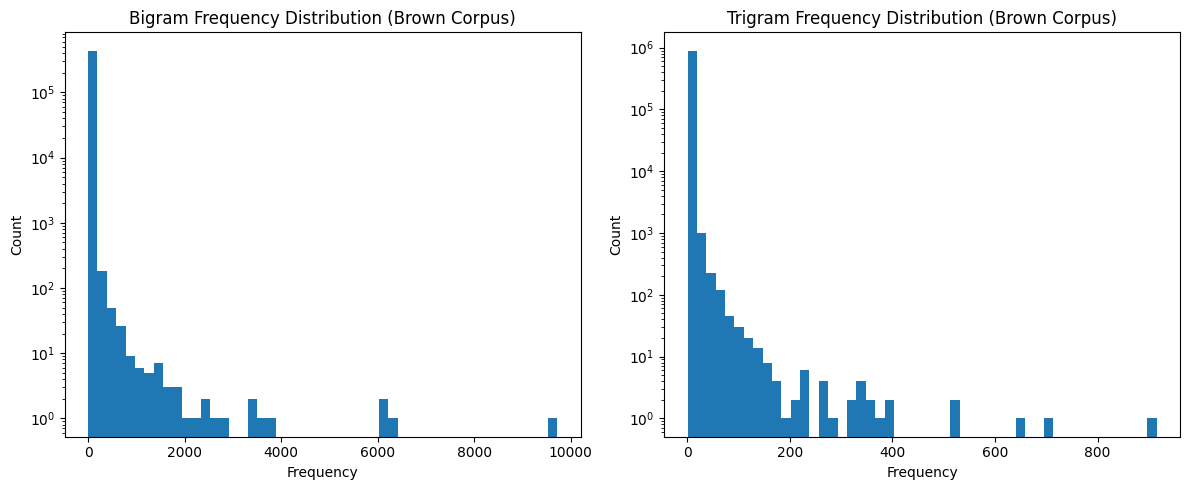

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot frequency distribution for trigrams
trigram_freqs = list(trigram_counts.values())
bigram_freqs = list(bigram_counts.values())

plt.figure(figsize=(12, 5))

# Plot bigram frequency distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(bigram_freqs, bins=50, log=True)
plt.title("Bigram Frequency Distribution (Brown Corpus)")
plt.xlabel("Frequency")
plt.ylabel("Count")

# Plot trigram frequency distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(trigram_freqs, bins=50, log=True)
plt.title("Trigram Frequency Distribution (Brown Corpus)")
plt.xlabel("Frequency")
plt.ylabel("Count")

# Adjust layout for a better fit
plt.tight_layout()

# Display the plots
plt.show()

**High Sparsity in Trigrams & Bigrams:** The first bar (near 0 frequency) is extremely tall, indicating that the vast majority of trigrams occur very rarely in the corpus.

---

In [ ]:
# Extract unique n-grams from the training set
unigrams_train = set(unigram_counter.keys())
bigrams_train = set(bigram_counter.keys())
trigrams_train = set(trigram_counter.keys())

# Extract unique n-grams from the validation set
unigrams_val = set(unigram_dev_counter.keys())
bigrams_val = set(bigram_dev_counter.keys())
trigrams_val = set(trigram_dev_counter.keys())

# Extract unique n-grams from the test set
unigrams_test = set(unigram_test_counter.keys())
bigrams_test = set(bigram_test_counter.keys())
trigrams_test = set(trigram_test_counter.keys())

# Calculate unseen n-grams in validation set
unseen_unigrams_val = unigrams_val - unigrams_train
unseen_bigrams_val = bigrams_val - bigrams_train
unseen_trigrams_val = trigrams_val - trigrams_train

# Calculate unseen n-grams in test set
unseen_unigrams_test = unigrams_test - unigrams_train
unseen_bigrams_test = bigrams_test - bigrams_train
unseen_trigrams_test = trigrams_test - trigrams_train

# Display results
print(f"Unseen unigrams in validation set: {len(unseen_unigrams_val)}")
print(f"Unseen bigrams in validation set: {len(unseen_bigrams_val)}")
print(f"Unseen trigrams in validation set: {len(unseen_trigrams_val)}\n")

print(f"Unseen unigrams in test set: {len(unseen_unigrams_test)}")
print(f"Unseen bigrams in test set: {len(unseen_bigrams_test)}")
print(f"Unseen trigrams in test set: {len(unseen_trigrams_test)}")


Unseen unigrams in validation set: 0
Unseen bigrams in validation set: 15724
Unseen trigrams in validation set: 53339

Unseen unigrams in test set: 0
Unseen bigrams in test set: 15919
Unseen trigrams in test set: 53599


- The number of unseen bigrams is relatively high, which indicates that while all individual words are known, there are many combinations of words in the validation and test sets that did not occur in the training set.

- The number of unseen trigrams is much larger than for bigrams, showing a significant increase in sparsity as you move to higher-order n-grams.
This is expected because trigrams grow even faster than bigrams, and many three-word combinations are unlikely to appear even in extensive training corpus.

- The similarity in the number of unseen bigrams (15724) and trigrams(53339) in the validation and test sets suggests that both sets share a similar level of complexity and relationship with the training data.

---